# DBSCAN Clustering Algorithm:
#DBSCAN is a density-based clustering algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space. It identifies clusters as dense regions in the data space separated by areas of lower density. Unlike K-Means or hierarchical clustering which assumes clusters are compact and spherical, DBSCAN perform well in handling real-world data irregularities such as:

#(1)Arbitrary-Shaped Clusters: Clusters can take any shape not just circular or convex.
#(2)Noise and Outliers: It effectively identifies and handles noise points without assigning them to any cluster.

# PCA Agorithmn:-
PCA (Principal Component Analysis) is a dimensionality reduction technique used in data analysis and machine learning. It helps you to reduce the number of features in a dataset while keeping the most important information. It changes your original features into new features these new features don’t overlap with each other and the first few keep most of the important differences found in the original data.

PCA is commonly used for data preprocessing for use with machine learning algorithms. It helps to remove redundancy, improve computational efficiency and make data easier to visualize and analyze especially when dealing with high-dimensional data.

In [31]:
# ---------------------------------------
# DBSCAN (From Scratch)
# First,Import the important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#==================================================================================================================================================================================================

In [32]:
# -------------------------------
# Step 1: Generate Synthetic Dataset
# -------------------------------
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)
#==================================================================================================================================================================================================

In [33]:
# -------------------------------
# Step 2: Define Utility Functions
# -------------------------------

def euclidean_distance(a, b):
    """To Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((a - b) ** 2))
#==================================================================================================================================================================================================
def region_query(X, point_idx, eps):
    """Find all points within eps distance of point_idx."""
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors
#==================================================================================================================================================================================================
def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, minPts):
    """It will help in expanding the cluster recursively."""
    labels[point_idx] = cluster_id
    
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        
        # If previously marked as noise, assign to cluster
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
        
        # If unvisited, visit and possibly expand
        elif labels[neighbor_idx] == 0:
            labels[neighbor_idx] = cluster_id
            new_neighbors = region_query(X, neighbor_idx, eps)
            if len(new_neighbors) >= minPts:
                neighbors += new_neighbors  # merge neighbor lists
        i += 1
#==================================================================================================================================================================================================
def dbscan(X, eps, minPts):
    """Main DBSCAN algorithm."""
    labels = np.zeros(len(X), dtype=int)  # 0 = unvisited
    cluster_id = 0

    for point_idx in range(len(X)):
        if labels[point_idx] != 0:
            continue  # It means already visited
        
        neighbors = region_query(X, point_idx, eps)
        if len(neighbors) < minPts:
            labels[point_idx] = -1  # mark as noise
        else:
            cluster_id += 1
            expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, minPts)
    
    return labels
#==================================================================================================================================================================================================

In [34]:
# -------------------------------
# Step 3: Run DBSCAN
# -------------------------------
eps = 0.2
minPts = 5
labels = dbscan(X, eps, minPts)
#==================================================================================================================================================================================================

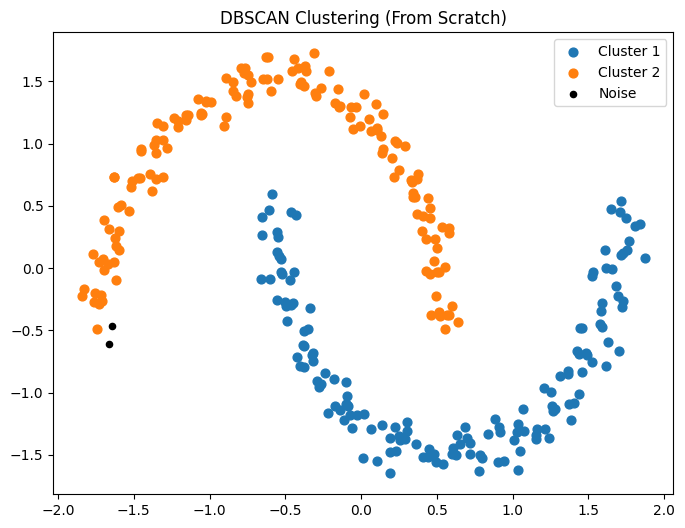

In [35]:
# -------------------------------
# Step 4: Visualization
# -------------------------------
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    cluster = X[labels == label]
    if label == -1:
        plt.scatter(cluster[:, 0], cluster[:, 1], c='black', s=20, label='Noise')
    else:
        plt.scatter(cluster[:, 0], cluster[:, 1], s=40, label=f'Cluster {int(label)}')

plt.title("DBSCAN Clustering (From Scratch)")
plt.legend()
plt.show()
#==================================================================================================================================================================================================

In [36]:
# -------------------------------
# Step 5: Evaluate with Silhouette Score
# -------------------------------
valid_clusters = [l for l in unique_labels if l != -1]
if len(valid_clusters) > 1:
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score not defined (only one cluster or all noise).")
    #===============================================================================================================================================================================================

Silhouette Score: 0.242


In [37]:
# Now,Implementing DBSCAN(from scratch) on Wine Dataset with PCA Projection

In [38]:
# ---------------------------------------
# Step 1: Load & Preprocess Data
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
#==================================================================================================================================================================================================
data = load_wine()
X = data.data
X = StandardScaler().fit_transform(X)
#==================================================================================================================================================================================================
# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
#==================================================================================================================================================================================================

In [39]:
# ---------------------------------------
# Step 3: Run DBSCAN (Scratch)
# ---------------------------------------
eps = 0.6   # We can also tune this
minPts = 6
labels_scratch = dbscan(X_pca, eps, minPts)
#==================================================================================================================================================================================================

In [40]:
from sklearn.cluster import DBSCAN as SklearnDBSCAN

# ---------------------------------------
# Step 4: Now,We will implement sklearn.DBSCAN for Comparison with our Scratch implementation
# ---------------------------------------
db = SklearnDBSCAN(eps=eps, min_samples=minPts)
labels_sklearn = db.fit_predict(X_pca)
#==================================================================================================================================================================================================

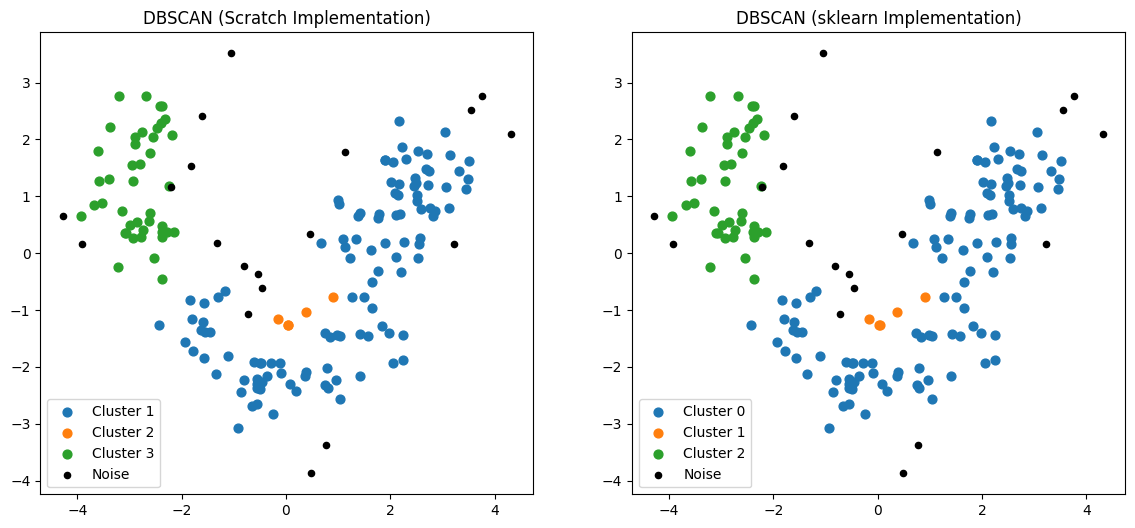

In [41]:
# Step 5: Visualization
# ---------------------------------------
fig, axs = plt.subplots(1, 2,figsize=(14, 6))
# Scratch version
unique_labels_scratch = set(labels_scratch)
for label in unique_labels_scratch:
    cluster = X_pca[labels_scratch == label]
    if label == -1:
        axs[0].scatter(cluster[:, 0], cluster[:, 1], c='black', s=20, label='Noise')
    else:
        axs[0].scatter(cluster[:, 0], cluster[:, 1], s=40, label=f'Cluster {int(label)}')
axs[0].set_title("DBSCAN (Scratch Implementation)")
axs[0].legend()
#==================================================================================================================================================================================================
# Sklearn version
unique_labels_sklearn = set(labels_sklearn)
for label in unique_labels_sklearn:
    cluster = X_pca[labels_sklearn == label]
    if label == -1:
        axs[1].scatter(cluster[:, 0], cluster[:, 1], c='black', s=20, label='Noise')
    else:
        axs[1].scatter(cluster[:, 0], cluster[:, 1], s=40, label=f'Cluster {int(label)}')
axs[1].set_title("DBSCAN (sklearn Implementation)")
axs[1].legend()

plt.show()
#==================================================================================================================================================================================================

In [42]:
# ---------------------------------------
# Step 6: Evaluation
# ---------------------------------------
valid_clusters_scratch = [l for l in unique_labels_scratch if l != -1]
valid_clusters_sklearn = [l for l in unique_labels_sklearn if l != -1]

if len(valid_clusters_scratch) > 1:
    print(f"Scratch DBSCAN Silhouette Score: {silhouette_score(X_pca, labels_scratch):.3f}")
else:
    print("Scratch DBSCAN: Silhouette Score not defined (only one cluster or all noise).")

if len(valid_clusters_sklearn) > 1:
    print(f"Sklearn DBSCAN Silhouette Score: {silhouette_score(X_pca, labels_sklearn):.3f}")
else:
    print("Sklearn DBSCAN: Silhouette Score not defined (only one cluster or all noise).")
#==================================================================================================================================================================================================

Scratch DBSCAN Silhouette Score: 0.013
Sklearn DBSCAN Silhouette Score: 0.013


In [43]:
# Hence,we successfully implemented DBSCAN Clustering on Wine Dataset and learnt how this differs from K-Means and Hierarchial Clustering and also visualized the result 
# by reducing the high dimensional datasets into low-dimensional datasets with the help of PCA.
# DBSCAN is more useful and effective while the data-points contains irregularities and PCA helps in reducing the dimensions of the datasets having large number of features.
